In [1]:
### Load PPS model
%run ./HC_NS_model.ipynb

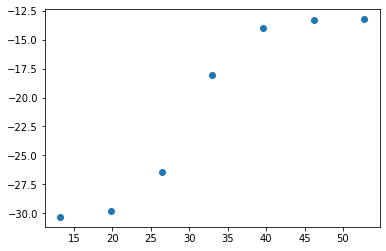

In [3]:
### Visuotactile experiment simulation setup

# Distance points in cm (network coordinates)
v_distances = np.asarray([13.2, 23.1, 33, 42.9, 52.8])
mydistances = np.linspace(v_distances[0], v_distances[-1], 7)

## Simulation setup
simtime = 100  # ms
bi = 0
g = 0.6

# Synapses setup
L_ex, L_in, S_ex, S_in = 0.15, 0.05, 1, 4

# Experimental Data
ymin = -30.35339096578619
ymax = -13.255889461344687
cp = 30.094
slope = 3.0898

HC_S_RTs = RTsig(mydistances, cp, slope)
plt.scatter(mydistances, HC_S_RTs)

In [5]:
def hcsocialmodelrun(theta):
    hcsRTs, ZMs, ZTs, ZAs = experimentrun(
        mydistances, simtime, bi, g, L_ex, L_in, S_ex, S_in, theta[0]
    )
    xf = hcsRTs
    yf = HC_S_RTs

    m = (xf.size * np.sum(xf * yf) - np.sum(xf) * np.sum(yf)) / (
        xf.size * np.sum(xf * xf) - np.sum(xf) ** 2
    )
    bias = (np.sum(yf) - m * np.sum(xf)) / xf.size

    if bias > 0:
        bias = 0
    if m < 0:
        m = 0

    cost = np.sum(np.square(np.divide(yf - (m * xf + bias), yf)))

    return cost * 100000


bounds = [(0.1, 4)]
boundaryhcsres = differential_evolution(hcsocialmodelrun, bounds, disp=True)

differential_evolution step 1: f(x)= 9710.22
differential_evolution step 2: f(x)= 8551.42
differential_evolution step 3: f(x)= 8551.42
differential_evolution step 4: f(x)= 8502.49
differential_evolution step 5: f(x)= 8502.49
differential_evolution step 6: f(x)= 8502.49
differential_evolution step 7: f(x)= 8502.49
differential_evolution step 8: f(x)= 8502.49
differential_evolution step 9: f(x)= 8502.49
differential_evolution step 10: f(x)= 8502.49
differential_evolution step 11: f(x)= 8502.49
differential_evolution step 12: f(x)= 8502.49


In [6]:
print(boundaryhcsres)

     fun: 8502.488049169326
 message: 'Optimization terminated successfully.'
    nfev: 197
     nit: 12
 success: True
       x: array([3.0587001])


In [4]:
sHC_RTs, ZMs, ZTs, ZVs = experimentrun(
    mydistances, simtime, bi, g, L_ex, L_in, S_ex, S_in, 3.0587001
)

2.070543567040004 0


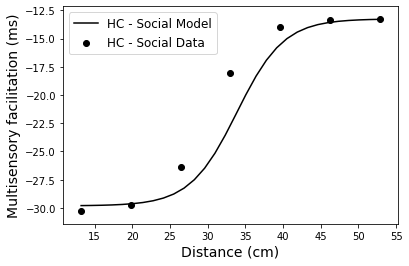

In [5]:
xf = sHC_RTs
yf = HC_S_RTs
m = (xf.size * np.sum(xf * yf) - np.sum(xf) * np.sum(yf)) / (
    xf.size * np.sum(xf * xf) - np.sum(xf) ** 2
)
bias = (np.sum(yf) - m * np.sum(xf)) / xf.size

if bias > 0:
    bias = 0
if m < 0:
    m = 0

ymin, ymax = np.min(m * xf + bias), np.max(m * xf + bias)
dc, h = sigfit(mydistances, m * xf + bias)
mydistances_exp = np.linspace(v_distances[0], v_distances[-1], 30)
yf_exp = RTsig(mydistances_exp, dc, h)

plt.figure(1)
plt.plot(mydistances_exp, yf_exp, label="HC - Social Model", color="k")
plt.scatter(mydistances, HC_S_RTs, label="HC - Social Data", color="k")
plt.ylabel("Multisensory facilitation (ms)", size=14)
plt.xlabel("Distance (cm)", size=14)
plt.legend(prop={"size": 12})
# plt.savefig('Results/hc_s_fitting.png', bbox_inches='tight')
print(m, bias)

In [6]:
socialhc = np.asarray([yf_exp, yf])
np.save("Results/socialhc_alter.npy", socialhc)

In [7]:
from sklearn import metrics

print(metrics.mean_squared_error(yf, m * xf + bias, squared=False))

2.0374052784000325
